### 1. Testing the development environment

In [1]:
import cv2
import numpy as np
import dlib

# Checking the OpenCV version
print("OpenCV version", cv2.__version__)

# Checking the Numpy version
print("Numpy version", np.__version__)

# Checking the dlib version
print("Dlib version", dlib.__version__)

OpenCV version 3.1.0
Numpy version 1.13.1
Dlib version 19.6.1


### 2. Finding Landmark points in an image

Plotting Landmark Points
278 250
279 300
283 352
291 402
308 448
335 486
372 515
413 534
459 538
503 532
540 509
570 478
591 442
603 401
612 360
619 317
624 275
328 228
352 210
386 209
419 217
449 228
498 234
528 231
555 229
581 236
596 255
473 261
472 289
471 316
470 344
429 364
448 369
467 375
485 372
500 368
360 256
381 250
402 253
421 265
400 268
379 267
506 274
525 265
547 267
564 276
547 283
526 282
401 426
427 409
448 405
465 411
482 407
500 413
515 430
499 439
481 445
463 447
445 444
425 439
411 425
448 418
465 421
482 420
505 428
481 424
464 425
447 423


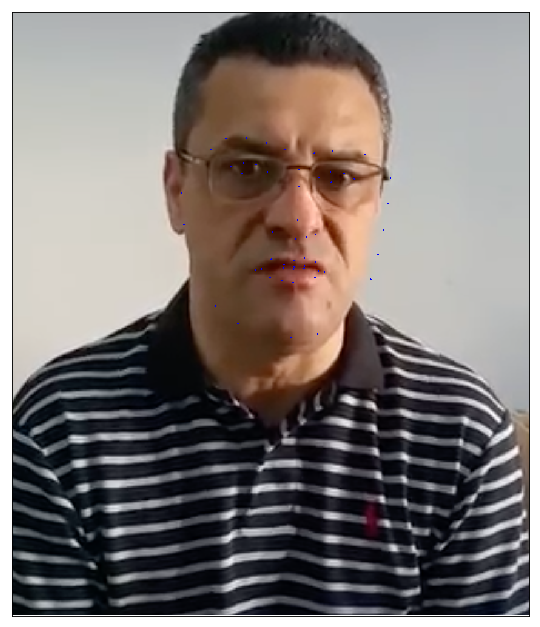

In [7]:
# Using dlib to detect the faces in an image

import cv2
import dlib
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from collections import OrderedDict

%matplotlib inline 

PATH = os.path.join("..","..","dependencies")
FILE_NAME = "shape_predictor_68_face_landmarks.dat"

IMAGE_PATH = os.path.join("..","images","faces","turkish.jpg")

predictor = dlib.shape_predictor(os.path.join(PATH,FILE_NAME))

# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 36)),
    ("jaw", (0, 17))
])

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords


def draw_bb(image, bound):
    image = image.copy() 
    
    pt1 = ( bound.left(), bound.top())
    pt2 = ( bound.right(), bound.bottom())    
    
    return cv2.rectangle(image, pt1, pt2, (0,255,0), thickness=1, lineType=8, shift=0)       


detector = dlib.get_frontal_face_detector()

im  =  mpimg.imread(IMAGE_PATH) # this is the input image

im  =  im[:,:,:3] 

oim = im.copy()

dets = detector(im)

for k, d in enumerate(dets): 
        im = draw_bb(im,d)
        
        gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)     
        
        shape = predictor(gray, d)
        
        shape = shape_to_np(shape)
        
        print("Plotting Landmark Points")
        for (x, y) in shape:
                cv2.circle(im, (x, y), 1, (0, 0, 255), -1)
                print(x,y)
        
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.imshow(im)
plt.xticks([]), plt.yticks([])
plt.show()

### 3. Finding Pose in an Image

Camera Matrix :
 [[ 854.    0.  427.]
 [   0.  854.  498.]
 [   0.    0.    1.]]
Rotation Vector:
 [[-1.70576091]
 [-0.24885463]
 [ 0.21357115]]
Translation Vector:
 [[-12.58020847]
 [ 44.72502221]
 [-51.61097082]]
Angle : 56.55527324365124


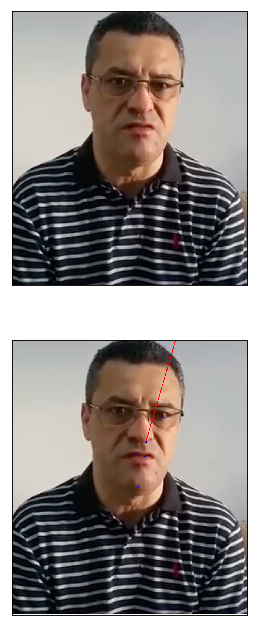

In [9]:
# Head-Pose Estimation

import os
import cv2
import math
import dlib
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from collections import OrderedDict

%matplotlib inline 

PATH = os.path.join("..","..","dependencies")
FILE_NAME = "shape_predictor_68_face_landmarks.dat"

predictor = dlib.shape_predictor(os.path.join(PATH,FILE_NAME))

#Image Space Landmarks
FACIAL_LANDMARKS = OrderedDict([
    ("nose_tip"   , 34),
    ("chin"       , 8 ),
    ("left_eye"   , 37),
    ("right_eye"  , 46),
    ("left_mouth" , 61),
    ("right_mouth", 65)
])

IMAGE_PATH = os.path.join("..","images","faces","turkish.jpg")

def angle(a, b, c):

    # Create vectors from points
    ba = [ aa-bb for aa,bb in zip(a,b) ]
    bc = [ cc-bb for cc,bb in zip(c,b) ]

    # Normalize vector
    nba = math.sqrt ( sum ( (x**2.0 for x in ba) ) )
    ba = [ x/nba for x in ba ]

    nbc = math.sqrt ( sum ( (x**2.0 for x in bc) ) )
    bc = [ x/nbc for x in bc ]

    # Calculate scalar from normalized vectors
    scal = sum ( (aa*bb for aa,bb in zip(ba,bc)) )

    # calculate the angle in radian
    angle = math.degrees(math.acos(scal))
    
    return angle

# function to read the image from file
def get_image(path):
    img = Image.open(path)
    img = np.array(img)
    
    #removes the alpha channel if it exists
    if img.shape[2] > 3:
        img  = img[:,:,0:3]     
    return np.array(img)


def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords


def draw_bb(image, bound):
    image = image.copy() 
    
    pt1 = ( bound.left(), bound.top())
    pt2 = ( bound.right(), bound.bottom())    
    
    return cv2.rectangle(image, pt1, pt2, (0,255,0), thickness=1, lineType=8, shift=0)       


detector = dlib.get_frontal_face_detector()

im  = get_image(IMAGE_PATH) # this is the input image

oim = im.copy() # making a copy of the original image

size = im.shape # size og the image

dets = detector(im) # running the face detector on the image to find faces
        
image_points = []

for k, d in enumerate(dets): 
    gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
    
    shape = predictor(gray, d)    
    shape = shape_to_np(shape)
    
    for name in FACIAL_LANDMARKS.keys(): #looping through designated landmarks in image space and map to obj space
        lmark = FACIAL_LANDMARKS[name]
        x,y = shape[lmark]
        image_points.append((x,y))
        
image_points = np.array(image_points,dtype="double")

object_points = np.array([
                            (0.0, 0.0, 0.0),             # Nose tip
                            (0.0, -330.0, -65.0),        # Chin
                            (-225.0, 170.0, -135.0),     # Left eye left corner
                            (225.0, 170.0, -135.0),      # Right eye right corne
                            (-150.0, -150.0, -125.0),    # Left Mouth corner
                            (150.0, -150.0, -125.0)      # Right mouth corner
                         
                        ])

# Camera internals
 
focal_length = size[1]
center = (size[1]/2, size[0]/2)
camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )
 
print("Camera Matrix :\n {0}".format(camera_matrix))
 
dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
(success, rotation_vector, translation_vector) = cv2.solvePnP(object_points, image_points, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)
 
print("Rotation Vector:\n {0}".format(rotation_vector))
print("Translation Vector:\n {0}".format(translation_vector))
 
 
# Project a 3D point (0, 0, 1000.0) onto the image plane.
# We use this to draw a line sticking out of the nose
 
 
(nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeffs)
 
for p in image_points:
    cv2.circle(im, (int(p[0]), int(p[1])), 3, (0,0,255), -1)
 
 
p1 = ( int(image_points[0][0]), int(image_points[0][1]))
p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))
 
cv2.line(im, p1, p2, (255,0,0), 2)

p3 = ( p2[0], 0)



fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(211)
plt.imshow(oim)
plt.xticks([]), plt.yticks([])


plt.subplot(212)
plt.imshow(im)
plt.xticks([]), plt.yticks([])

print("Angle : {0}".format(angle(p3,p1,p2)))

plt.show()

### 4. Finding Head Pose in a Video Stream

In [10]:
detector = dlib.get_frontal_face_detector()

In [11]:
# Real-Time Facial Landmark in Videos

def process_image(frame):
    
    dets = detector(frame)

    for k, d in enumerate(dets): 

            gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)     

            shape = predictor(gray, d)

            shape = shape_to_np(shape)

            for (x, y) in shape:
                    cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
                
    return frame

In [12]:
# Real-Time Facial Landmark in Videos 

def process_image(frame):
    
    #Image Space Landmarks
    FACIAL_LANDMARKS = OrderedDict([
        ("nose_tip"   , 34),
        ("chin"       , 8 ),
        ("left_eye"   , 37),
        ("right_eye"  , 46),
        ("left_mouth" , 61),
        ("right_mouth", 65)
    ])

    
    size = frame.shape
    
    dets = detector(frame)
    
    image_points = []

    for k, d in enumerate(dets): 

            gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)     

            shape = predictor(gray, d)

            shape = shape_to_np(shape)
            
            for name in FACIAL_LANDMARKS.keys(): #looping through designated landmarks in image space and map to obj space
                lmark = FACIAL_LANDMARKS[name]
                x,y = shape[lmark]
                image_points.append((x,y))
                cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
    
    if(len(image_points) < 4):
        return frame
    
    image_points = np.array(image_points,dtype="double")
    
    object_points = np.array([
                                        (0.0, 0.0, 0.0),             # Nose tip
                                        (0.0, -330.0, -65.0),        # Chin
                                        (-225.0, 170.0, -135.0),     # Left eye left corner
                                        (225.0, 170.0, -135.0),      # Right eye right corne
                                        (-150.0, -150.0, -125.0),    # Left Mouth corner
                                        (150.0, -150.0, -125.0)      # Right mouth corner

                                    ])

    # Camera internals

    focal_length = size[1]
    center = (size[1]/2, size[0]/2)
    camera_matrix = np.array(
                                     [[focal_length, 0, center[0]],
                                     [0, focal_length, center[1]],
                                     [0, 0, 1]], dtype = "double"
                                     )
        
    dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
    (success, rotation_vector, translation_vector) = cv2.solvePnP(object_points, image_points, camera_matrix, dist_coeffs, flags=cv2.SOLVEPNP_ITERATIVE)

    (nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeffs)

    p1 = ( int(image_points[0][0]), int(image_points[0][1]))
    p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

    cv2.line(frame, p1, p2, (255,0,0), 2)
    
    
    return frame

In [13]:
# Installing ffmpeg for playing video's in notebook
import imageio

imageio.plugins.ffmpeg.download()

Imageio: 'ffmpeg.linux64' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg.linux64 (27.2 MB)
Downloading: 8192/28549024 bytes (0.0319488/28549024 bytes (1.11097728/28549024 bytes (3.8%1695744/28549024 bytes (5.9%2367488/28549024 bytes (8.3%3039232/28549024 bytes (10.63735552/28549024 bytes (13.14464640/28549024 bytes (15.65218304/28549024 bytes (18.35939200/28549024 bytes (20.86709248/28549024 bytes (23.57544832/28549024 bytes (26.48118272/28549024 bytes (28.48904704/28549024 bytes (31.29805824/28549024 bytes (34.310493952/28549024 bytes (36.8%11231232/28549024 bytes (39.3%12066816/28549024 bytes (42.3%12697600/28549024 bytes (44.5%13344768/28549024 bytes (46.7%14196736/28549024 bytes (49.7%15040512/28549024 bytes (52.7%15966208/28549024 bytes (55.9%16752640/28549024 bytes (58.7%17539072/28549024 bytes (61.4%18063360/28549024 bytes (63.3%18538496/28549024 bytes (64.9%19013632/28549024 bytes (66

In [15]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import os

INPUT_VIDEO  = os.path.join("..","images","videos","turkish.mp4")
OUTPUT_VIDEO = os.path.join("..","images","videos","turkish_Processed.mp4") 

input_video = VideoFileClip(INPUT_VIDEO).subclip(0,30)
input_clip = input_video.fl_image(process_image)
%time input_clip.write_videofile(OUTPUT_VIDEO, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(OUTPUT_VIDEO))

[MoviePy] >>>> Building video ../images/videos/turkish_Processed.mp4
[MoviePy] Writing video ../images/videos/turkish_Processed.mp4



 51%|█████▏    | 462/901 [00:21<00:47,  9.32it/s]


100%|█████████▉| 900/901 [00:42<00:00, 21.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../images/videos/turkish_Processed.mp4 

CPU times: user 38.1 s, sys: 690 ms, total: 38.8 s
Wall time: 42.6 s
